In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
!pip install git+git://github.com/rasbt/mlxtend.git

  Cloning git://github.com/rasbt/mlxtend.git to /tmp/pip-req-build-wb9wnvlo
  Running command git clone -q git://github.com/rasbt/mlxtend.git /tmp/pip-req-build-wb9wnvlo
  Created wheel for mlxtend: filename=mlxtend-0.18.0-py2.py3-none-any.whl size=1588831 sha256=12a3a3872cec9275dab2287bcc036de98df22b1f595eb906c4b828581de488f0
  Stored in directory: /tmp/pip-ephem-wheel-cache-o10_1bob/wheels/85/e4/4c/ee71547ac9ea223b07fe8f55b0e5f71536a6a34ae3480205f3
Successfully built mlxtend


In [ ]:
!ls drive/My\ Drive/ML\ Project/data/

project3_dataset1.txt  project3_dataset2.txt


# project dataset 1

In [ ]:
# You might need to change this path or put the ML project folder in your drive 
import_path = 'drive/My Drive/ML Project/data/project3_dataset1.txt'
dataset_1 = pd.read_csv(import_path, sep="\t", header=None)
dataset_1.head()



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.024230,0.039500,0.016780,0.01898,0.002498,23.69,38.25,155.00,1731.0,0.1166,0.19220,0.32150,0.16280,0.2572,0.06637,1
1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.033450,0.036720,0.011370,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.52490,0.53550,0.17410,0.3985,0.12440,1
2,11.26,19.96,73.72,394.1,0.08020,0.11810,0.09274,0.05588,0.2595,0.06233,0.4866,1.9050,2.877,34.68,0.015740,0.082620,0.080990,0.034870,0.03418,0.006517,11.86,22.33,78.27,437.6,0.1028,0.18430,0.15460,0.09314,0.2955,0.07009,0
3,11.43,15.39,73.06,399.8,0.09639,0.06889,0.03503,0.02875,0.1734,0.05865,0.1759,0.9938,1.143,12.67,0.005133,0.015210,0.014340,0.008602,0.01501,0.001588,12.32,22.02,79.93,462.0,0.1190,0.16480,0.13990,0.08476,0.2676,0.06765,0
4,14.61,15.69,92.68,664.9,0.07618,0.03515,0.01447,0.01877,0.1632,0.05255,0.3160,0.9115,1.954,28.90,0.005031,0.006021,0.005325,0.006324,0.01494,0.000895,16.46,21.75,103.70,840.8,0.1011,0.07087,0.04746,0.05813,0.2530,0.05695,0


# Train/Test Split

In [ ]:
dataset1_features = dataset_1.drop([30], axis = 1) # and drop whatever other featuers you dont want to use in your algorithm
dataset1_labels = dataset_1[30].copy()

In [ ]:
dataset1_labels

0      1
1      1
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    0
Name: 30, Length: 569, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset1_features, dataset1_labels, test_size=0.20)

# Normalization of Data

In [ ]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

X_train = num_pipeline.fit_transform(X_train)
X_test = num_pipeline.fit_transform(X_test)

# Building preliminary decision tree classifier

In [ ]:
# preliminary decision tree (not optimized) 

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

df

,Actual,Predicted
520,1,1
526,1,1
469,0,0
424,0,0
203,1,1
...,...,...
193,0,0
554,1,0
90,0,0
525,0,0


[Text(894.375, 630.9642857142857, 'X[22] <= 0.162\ngini = 0.472\nsamples = 455\nvalue = [281, 174]'),
 Text(618.75, 533.8928571428571, 'X[27] <= 0.323\ngini = 0.164\nsamples = 300\nvalue = [273, 27]'),
 Text(382.5, 436.82142857142856, 'X[13] <= -0.102\ngini = 0.058\nsamples = 268\nvalue = [260, 8]'),
 Text(180.0, 339.75, 'X[14] <= -1.224\ngini = 0.016\nsamples = 252\nvalue = [250, 2]'),
 Text(90.0, 242.67857142857144, 'X[8] <= -0.18\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(45.0, 145.6071428571429, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(135.0, 145.6071428571429, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(270.0, 242.67857142857144, 'X[21] <= 1.188\ngini = 0.008\nsamples = 245\nvalue = [244, 1]'),
 Text(225.0, 145.6071428571429, 'gini = 0.0\nsamples = 228\nvalue = [228, 0]'),
 Text(315.0, 145.6071428571429, 'X[21] <= 1.262\ngini = 0.111\nsamples = 17\nvalue = [16, 1]'),
 Text(270.0, 48.535714285714334, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(360.0, 4

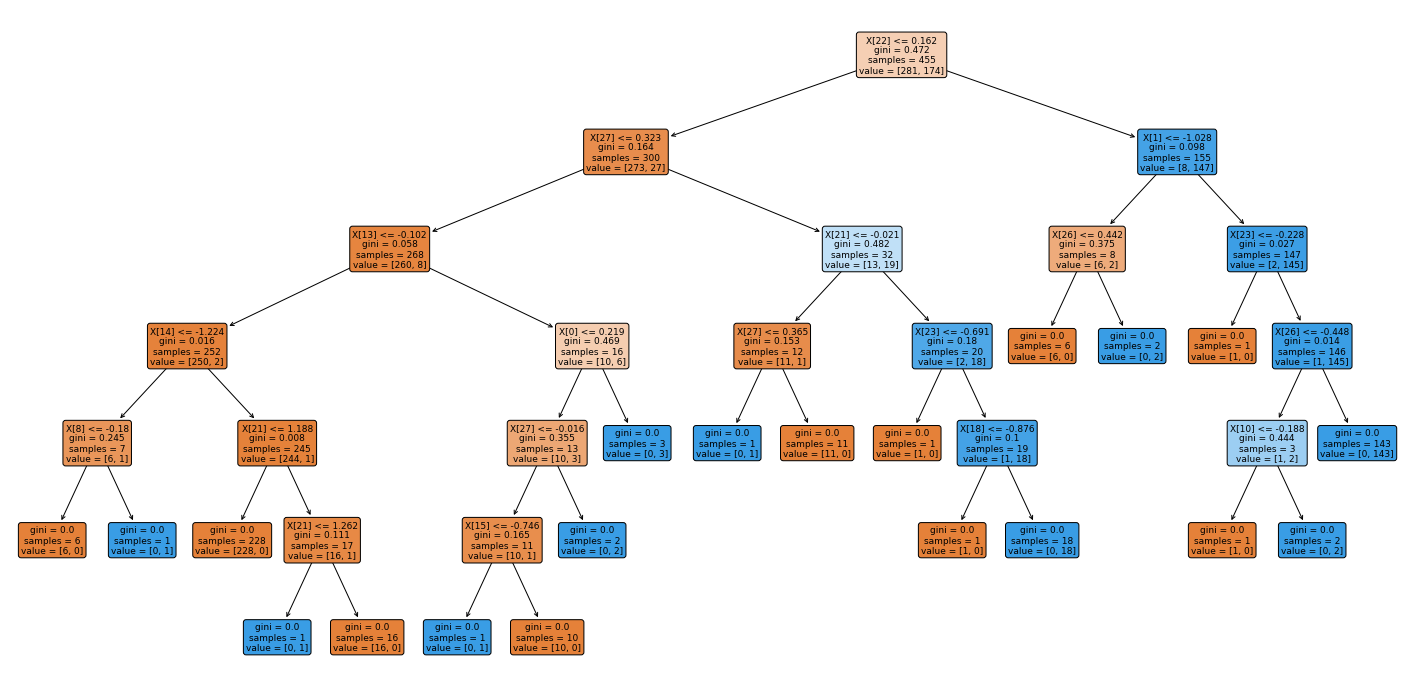

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.evaluate import bias_variance_decomp
from sklearn import metrics


plt.figure(figsize=(25, 12.5))
plot_tree(classifier, filled=True, rounded=True)


[[70  6]
 [ 3 35]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        76
           1       0.85      0.92      0.89        38

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.92      0.92       114



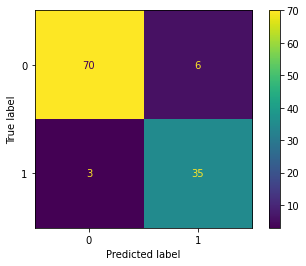

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

plot_confusion_matrix(classifier, X_test, y_test)

In [ ]:
print("Train Accuracy:", classifier.score(X_train, y_train))
print("Test Accuracy:", classifier.score(X_test, y_test))


Train Accuracy: 1.0
Test Accuracy: 0.9210526315789473


# Cost-complexity pruning

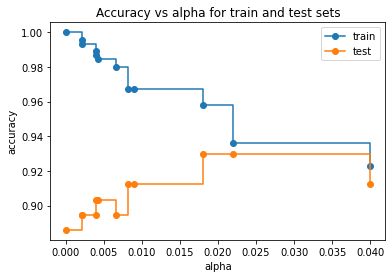

In [ ]:
# cost complexity pruning
path = classifier.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

classifiers = []

for ccp_alpha in ccp_alphas:
  classifier = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  classifier.fit(X_train, y_train)
  classifiers.append(classifier)


train_scores = [classifier.score(X_train, y_train) for classifier in classifiers]
test_scores = [classifier.score(X_test, y_test) for classifier in classifiers]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for train and test sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()





# Cross-validation

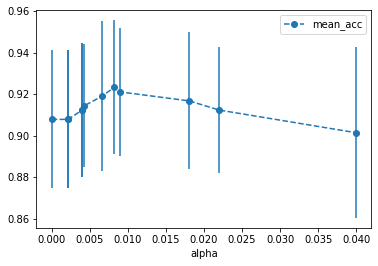

In [ ]:
# cross validation

alpha_loop_values = []

for ccp_alpha in ccp_alphas:
  classifier = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  scores = cross_val_score(classifier, X_train, y_train, cv=10)
  alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_acc', 'std'])

alpha_results.plot(x='alpha', y='mean_acc', yerr='std', marker='o', linestyle='--')




# Results

In [ ]:

idx = np.argmax(alpha_results['mean_acc'])
ideal_ccp_alpha = alpha_results.iloc[idx]['alpha']

ideal_ccp_alpha



0.008241758241758242

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        76
           1       0.87      0.87      0.87        38

    accuracy                           0.91       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114



[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Accuracy: 0.92 (+/- 0.07)


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    2.1s finished


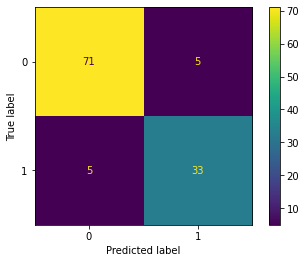

In [ ]:
from sklearn.model_selection import cross_val_score

pruned_classifier = DecisionTreeClassifier(ccp_alpha=ideal_ccp_alpha)

pruned_classifier = pruned_classifier.fit(X_train, y_train)

y_pred = pruned_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

plot_confusion_matrix(pruned_classifier, X_test, y_test)

scores = cross_val_score(pruned_classifier, X_train, y_train, cv=10, verbose=1, n_jobs=4)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


[Text(659.4545454545455, 475.65000000000003, 'X[22] <= 0.162\ngini = 0.472\nsamples = 455\nvalue = [281, 174]'),
 Text(405.8181818181818, 339.75, 'X[27] <= 0.323\ngini = 0.164\nsamples = 300\nvalue = [273, 27]'),
 Text(202.9090909090909, 203.85000000000002, 'X[13] <= -0.102\ngini = 0.058\nsamples = 268\nvalue = [260, 8]'),
 Text(101.45454545454545, 67.94999999999999, 'gini = 0.016\nsamples = 252\nvalue = [250, 2]'),
 Text(304.3636363636364, 67.94999999999999, 'gini = 0.469\nsamples = 16\nvalue = [10, 6]'),
 Text(608.7272727272727, 203.85000000000002, 'X[21] <= -0.021\ngini = 0.482\nsamples = 32\nvalue = [13, 19]'),
 Text(507.27272727272725, 67.94999999999999, 'gini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(710.1818181818181, 67.94999999999999, 'gini = 0.18\nsamples = 20\nvalue = [2, 18]'),
 Text(913.0909090909091, 339.75, 'X[1] <= -1.028\ngini = 0.098\nsamples = 155\nvalue = [8, 147]'),
 Text(811.6363636363636, 203.85000000000002, 'gini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Te

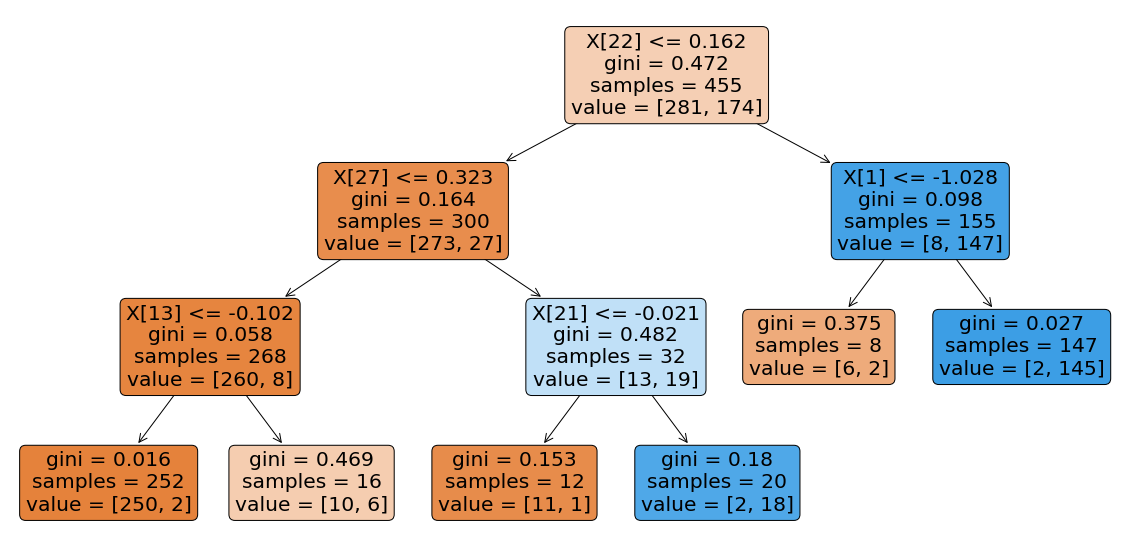

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(pruned_classifier, filled=True, rounded=True)



In [ ]:

fpr, tpr, thresholds = metrics.roc_curve(y_test+1, y_pred, pos_label=2)
print(f'AUC: {metrics.auc(fpr, tpr)}')

AUC: 0.9013157894736843


In [ ]:
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Precision: 0.868421052631579
Recall: 0.868421052631579


# Bias-variance tradeoff

Dataset 1:


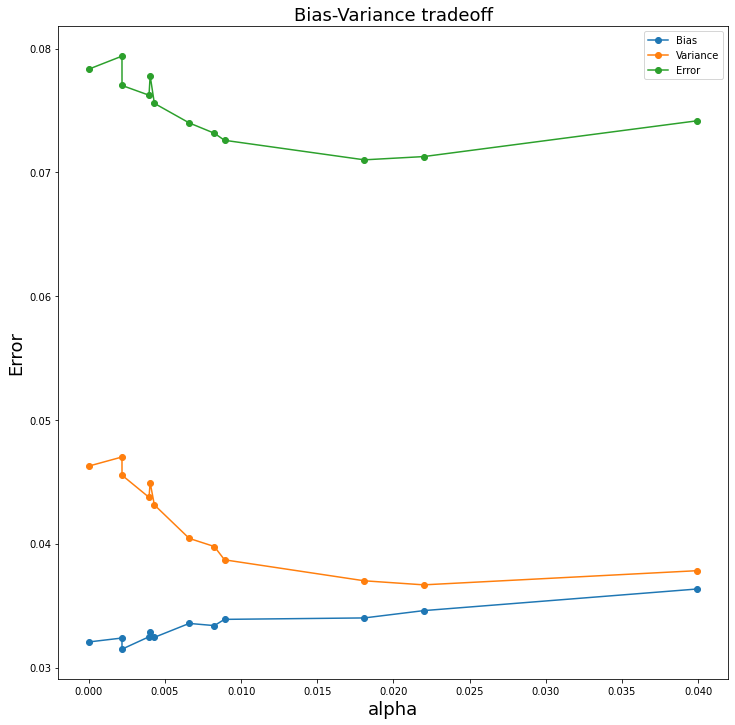

In [ ]:
def plot_bias_var_tradeoff(parameters, bias, variance, err):
  plt.figure(figsize=(12,12))
  plt.plot(parameters, bias, marker='o')
  plt.plot(parameters, variance, marker='o',)
  plt.plot(parameters, err, marker='o',)
  plt.legend(["Bias", "Variance", "Error"])
  plt.title('Bias-Variance tradeoff', fontsize=18)
  plt.xlabel('alpha', fontsize=18)
  plt.ylabel('Error', fontsize=18)




print('Dataset 1:')
bias_1 = []
var_1 = []
err_1 = []
for ccp_alpha in ccp_alphas:
  # normalise data
  # setup Logistic Regression
  pruned_classifier = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
  # Predict
  pruned_classifier.fit(X_train, y_train)
  mse, bias, var = bias_variance_decomp(pruned_classifier, np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test), loss='mse', num_rounds=200, random_seed=1)
  # Calculate matrices
  bias_1.append(bias)
  var_1.append(var)
  err_1.append(mse)

# plot
plot_bias_var_tradeoff(ccp_alphas, bias_1, var_1, err_1)


# https://machinelearningmastery.com/calculate-the-bias-variance-trade-off/
# https://www.machinecurve.com/index.php/2020/11/02/machine-learning-error-bias-variance-and-irreducible-error-with-python/#bias-error
# http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.evaluate/#bias_variance_decomp

In [ ]:
print(ccp_alphas)

[0.         0.00209314 0.00218905 0.00351648 0.00380572 0.00384615
 0.00434335 0.00436465 0.0061623  0.00854744 0.01009435 0.06872065]


# project dataset 2 

In [ ]:
import_path = 'drive/My Drive/ML Project/data/project3_dataset2.txt'
dataset_2 = pd.read_csv(import_path, sep="\t", header=None)
dataset_2.head()

temp = dataset_2.loc[dataset_2[4] != 'Present']
#print(len(temp))


dataset_2 = dataset_2.replace('Present', 1)
dataset_2 = dataset_2.replace('Absent', 0)


dataset2_features = dataset_2.drop([9], axis = 1) # and drop whatever other featuers you dont want to use in your algorithm
dataset2_labels = dataset_2[9].copy()



X_train, X_test, y_train, y_test = train_test_split(dataset2_features, dataset2_labels, test_size=0.20)


X_train = num_pipeline.fit_transform(X_train)
X_test = num_pipeline.fit_transform(X_test)


print(X_train.shape)
print(X_train.shape)







(369, 9)
(369, 9)


# Preliminary classifier

[[45 21]
 [12 15]]
              precision    recall  f1-score   support

           0       0.79      0.68      0.73        66
           1       0.42      0.56      0.48        27

    accuracy                           0.65        93
   macro avg       0.60      0.62      0.60        93
weighted avg       0.68      0.65      0.66        93

Train Accuracy: 1.0
Test Accuracy: 1.0


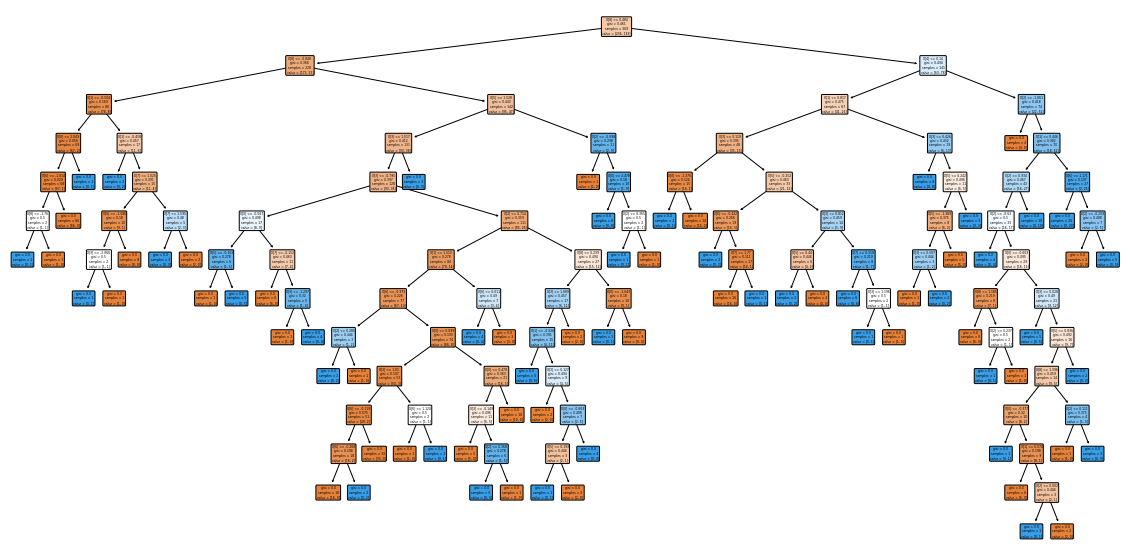

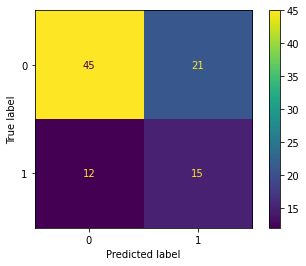

In [ ]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(classifier, filled=True, rounded=True)

y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

plot_confusion_matrix(classifier, X_test, y_test)

print("Train Accuracy:", classifier.score(X_train, y_train))
print("Test Accuracy:", classifier.score(X_train, y_train))






Cost-complexity pruning and cross-validation

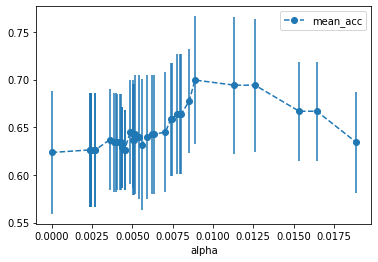

In [ ]:
path = classifier.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]


alpha_loop_values = []


for ccp_alpha in ccp_alphas:
  classifier = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  scores = cross_val_score(classifier, X_train, y_train, cv=10)
  alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_acc', 'std'])

alpha_results.plot(x='alpha', y='mean_acc', yerr='std', marker='o', linestyle='--')

[Text(472.15384615384613, 475.65000000000003, 'X[8] <= 0.484\ngini = 0.461\nsamples = 369\nvalue = [236, 133]'),
 Text(171.69230769230768, 339.75, 'X[8] <= -0.848\ngini = 0.366\nsamples = 228\nvalue = [173, 55]'),
 Text(85.84615384615384, 203.85000000000002, 'gini = 0.169\nsamples = 86\nvalue = [78, 8]'),
 Text(257.53846153846155, 203.85000000000002, 'X[5] <= 1.528\ngini = 0.443\nsamples = 142\nvalue = [95, 47]'),
 Text(171.69230769230768, 67.94999999999999, 'gini = 0.412\nsamples = 131\nvalue = [93, 38]'),
 Text(343.38461538461536, 67.94999999999999, 'gini = 0.298\nsamples = 11\nvalue = [2, 9]'),
 Text(772.6153846153845, 339.75, 'X[4] <= 0.14\ngini = 0.494\nsamples = 141\nvalue = [63, 78]'),
 Text(600.9230769230769, 203.85000000000002, 'X[1] <= 0.817\ngini = 0.475\nsamples = 67\nvalue = [41, 26]'),
 Text(515.0769230769231, 67.94999999999999, 'gini = 0.395\nsamples = 48\nvalue = [35, 13]'),
 Text(686.7692307692307, 67.94999999999999, 'gini = 0.432\nsamples = 19\nvalue = [6, 13]'),
 Tex

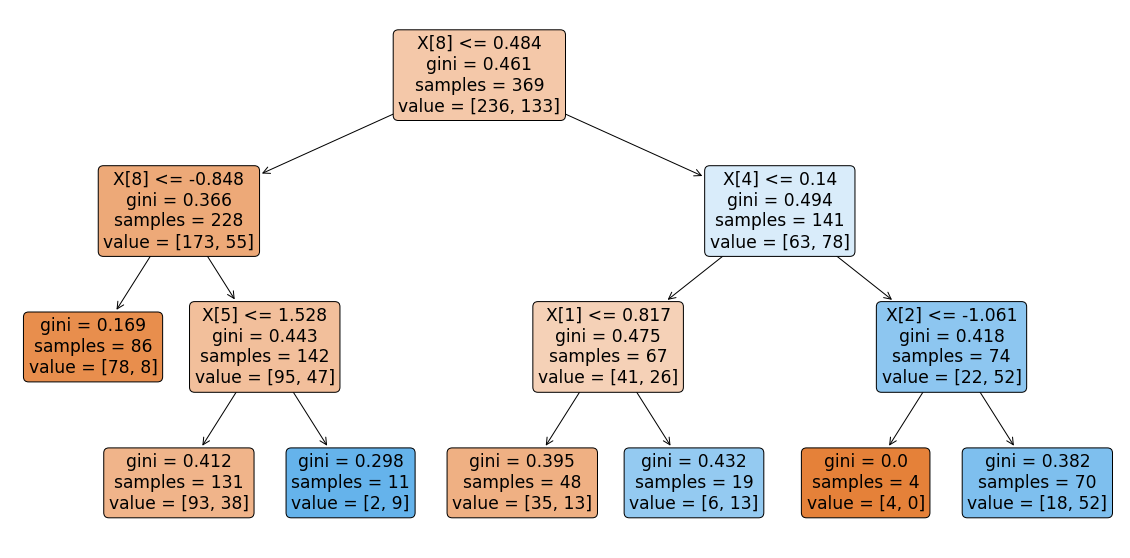

In [ ]:
idx = np.argmax(alpha_results['mean_acc'])
ideal_ccp_alpha = alpha_results.iloc[idx]['alpha']

pruned_classifier = DecisionTreeClassifier(ccp_alpha=ideal_ccp_alpha)




pruned_classifier = pruned_classifier.fit(X_train, y_train)



plt.figure(figsize=(20, 10))
plot_tree(pruned_classifier, filled=True, rounded=True)



# Results

              precision    recall  f1-score   support

           0       0.79      0.68      0.73        66
           1       0.42      0.56      0.48        27

    accuracy                           0.65        93
   macro avg       0.60      0.62      0.60        93
weighted avg       0.68      0.65      0.66        93

Train Accuracy: 0.7696476964769647
Test Accuracy: 0.7696476964769647
Accuracy: 0.70 (+/- 0.13)
AUC: 0.7390572390572392
Precision: 0.6296296296296297
Recall: 0.6296296296296297


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


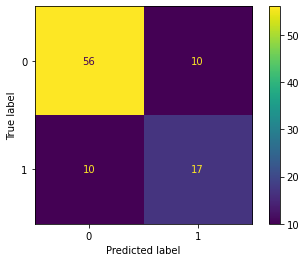

In [ ]:
print(classification_report(y_test, y_pred))
plot_confusion_matrix(pruned_classifier, X_test, y_test)

y_pred = pruned_classifier.predict(X_test)

print("Train Accuracy:", pruned_classifier.score(X_train, y_train))
print("Test Accuracy:", pruned_classifier.score(X_train, y_train))

scores = cross_val_score(pruned_classifier, X_train, y_train, cv=10, verbose=1, n_jobs=4)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


fpr, tpr, thresholds = metrics.roc_curve(y_test+1, y_pred, pos_label=2)
print(f'AUC: {metrics.auc(fpr, tpr)}')

precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')



# Bias-variance tradeoff

Dataset 2:


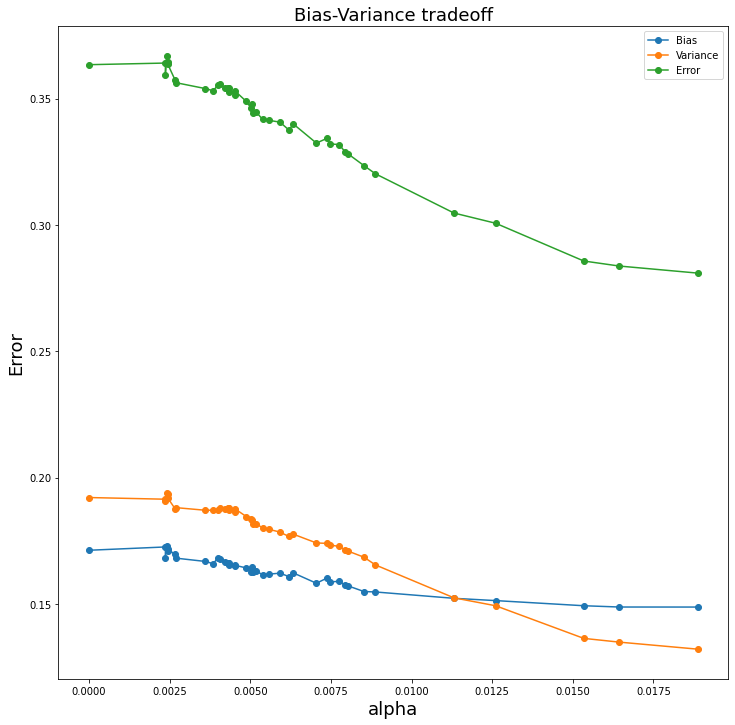

In [ ]:
print('Dataset 2:')
bias_2 = []
var_2 = []
err_2 = []
for ccp_alpha in ccp_alphas:
  # normalise data
  # setup Logistic Regression
  pruned_classifier = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
  # Predict
  pruned_classifier.fit(X_train, y_train)
  mse, bias, var = bias_variance_decomp(pruned_classifier, np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test), loss='mse', num_rounds=200, random_seed=1)
  # Calculate matrices
  bias_2.append(bias)
  var_2.append(var)
  err_2.append(mse)

# plot
plot_bias_var_tradeoff(ccp_alphas, bias_2, var_2, err_2)